#  Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Create a boxplot for each feature in the dataset. 
4. Compare distributions and identify outliers.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
iris = sns.load_dataset('iris')

In [3]:
# 1. Feature information
print("Feature Types:")
print(iris.dtypes)
print("\n")

Feature Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object




Creating histograms...


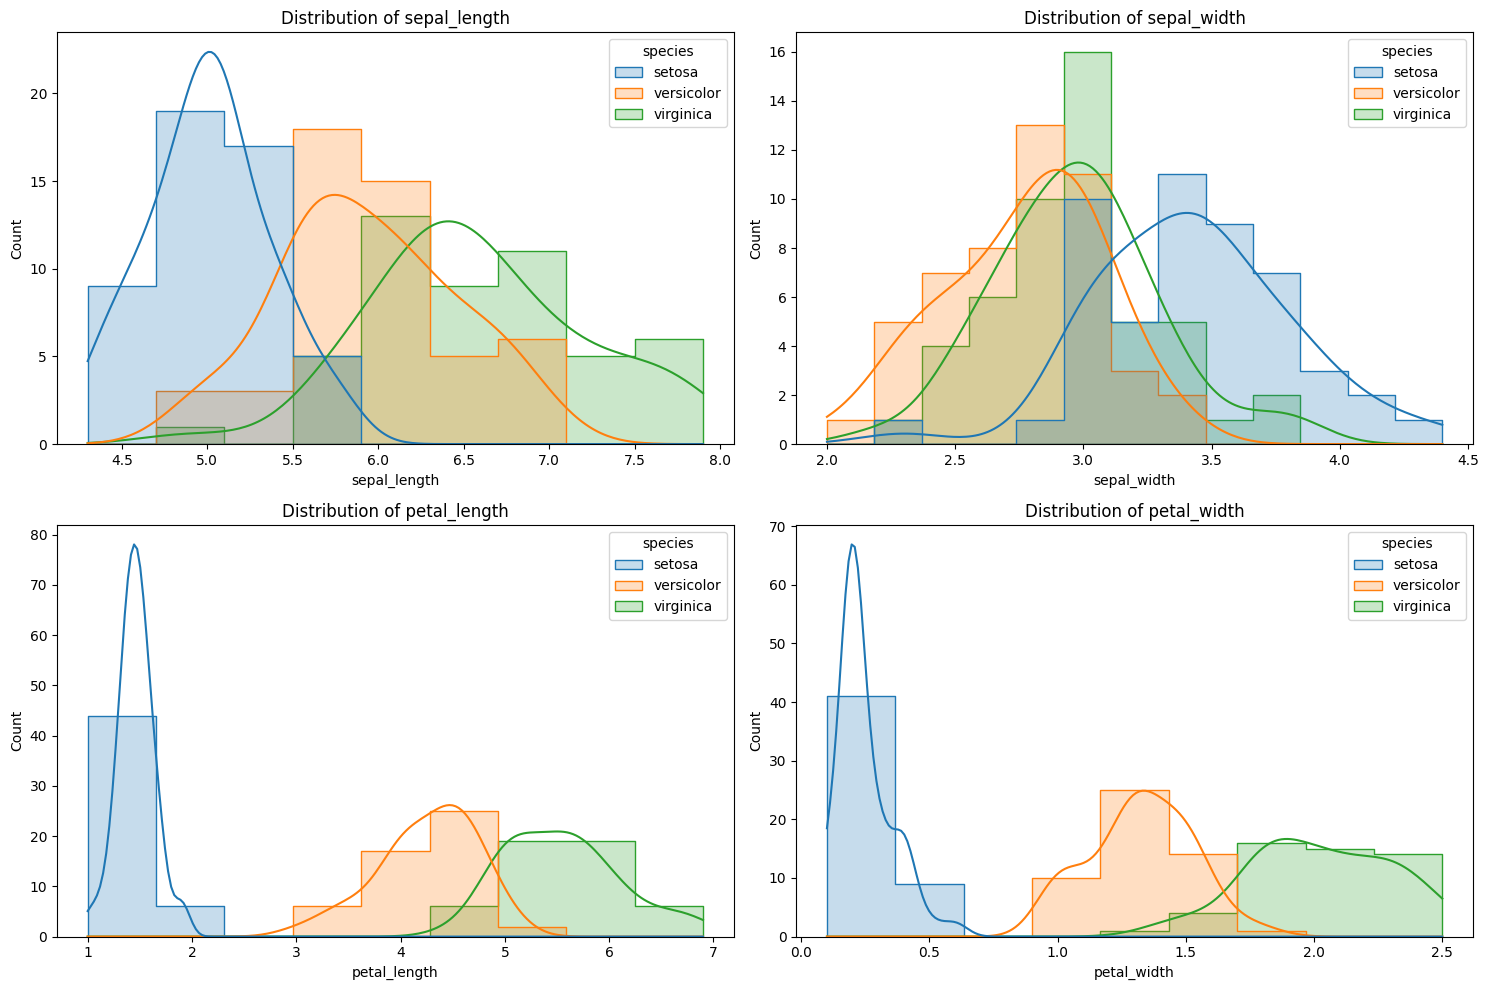

In [4]:
# 2. Histograms
print("Creating histograms...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris, x=feature, kde=True, hue='species', element='step')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Creating boxplots...


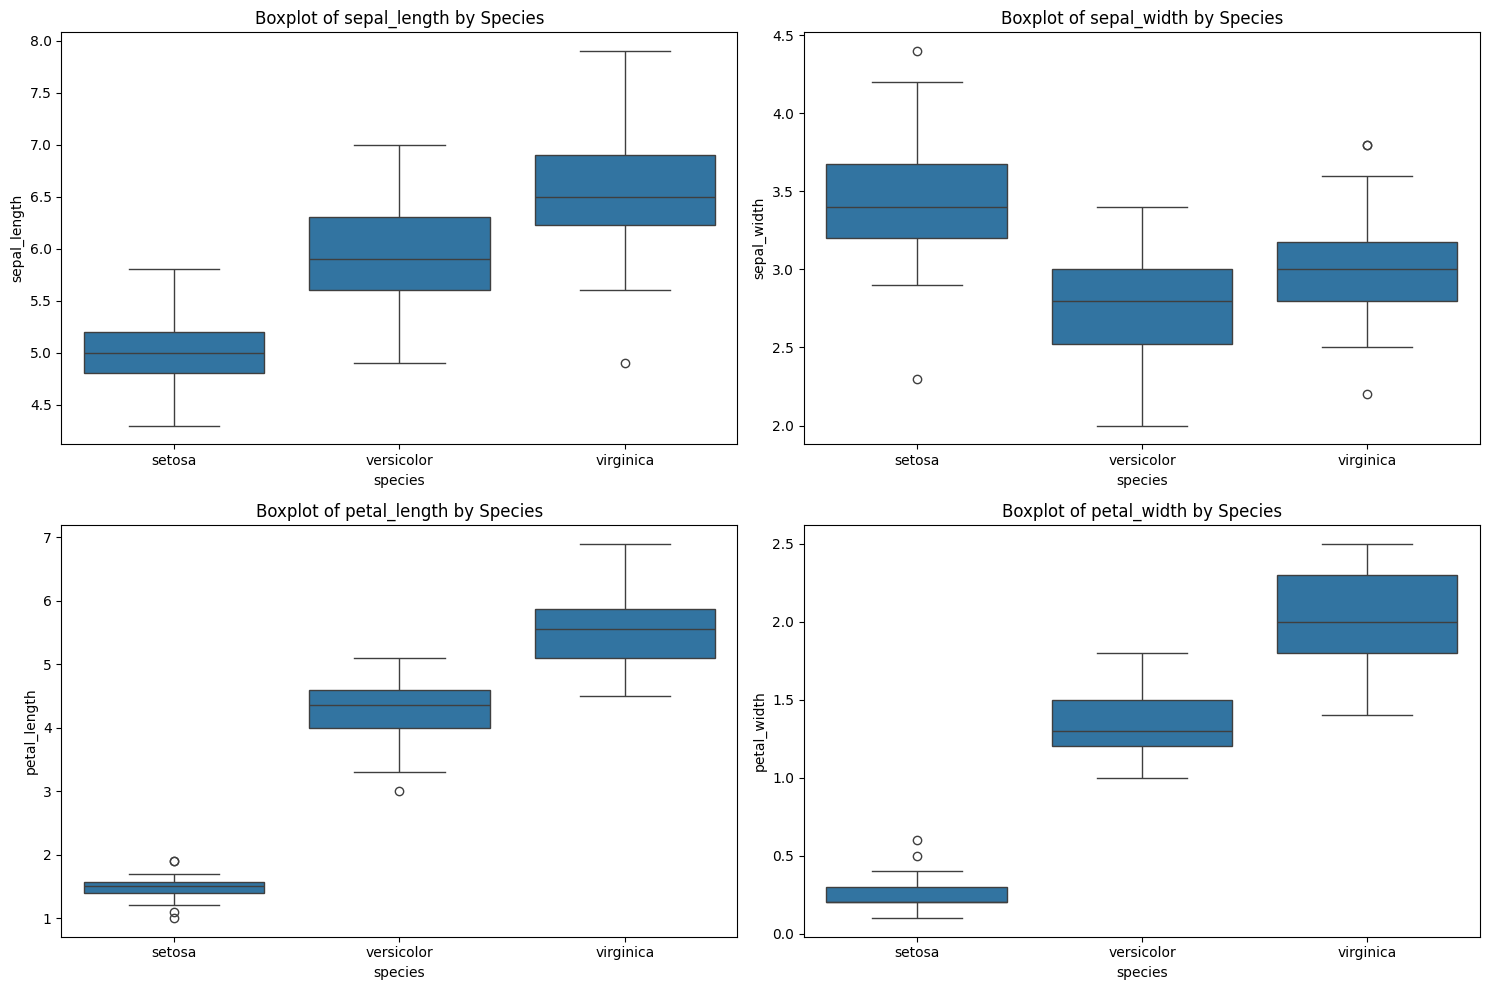

In [5]:
# 3. Boxplots
print("Creating boxplots...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()

In [6]:
# 4. Outlier analysis
print("\nOutlier Analysis:")
for feature in iris.columns[:-1]:
    print(f"\nPotential outliers in {feature}:")
    for species in iris['species'].unique():
        subset = iris[iris['species'] == species][feature]
        q1 = subset.quantile(0.25)
        q3 = subset.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        if not outliers.empty:
            print(f"{species}: {list(outliers.round(2))}")


Outlier Analysis:

Potential outliers in sepal_length:
virginica: [4.9]

Potential outliers in sepal_width:
setosa: [4.4, 2.3]
virginica: [3.8, 2.2, 3.8]

Potential outliers in petal_length:
setosa: [1.1, 1.0, 1.9, 1.9]
versicolor: [3.0]

Potential outliers in petal_width:
setosa: [0.5, 0.6]
